In [4]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helpers import cusplot as cplt

In [16]:
# data

# Coulomb
C = 1.6*1e-19
# detector efficiency
gn  = 1.3*1e-6


d = {'Material':['V','V','Ta','V/Ta','V','Ta','V/Ta','V','Ta','V/Ta','V','Ta','V/Ta','Ta','V/Ta'],
     'Energy':[20,30,30,30,35,35,35,40,40,40,45,45,45,50,50],
     'n/ion':[0.0074,0.0182,0.0151,0.01887,0.025,0.024,0.0278,0.0328,0.0353,0.0391,0.0413,0.0486,0.0524,0.0640,0.0678],
     'Target':['S','S','S','M','S','S','M','S','S','M','S','S','M','S','M'],
     'I [nA]':[0.4,0.5,0.5,0.5,0.5,0.5,0.5,0.8,0.8,0.8,0.8,0.8,0.8,1,1],
     'I error [nA]':[0.066,0.066,0.066,0.066,0.066,0.066,0.066,0.023,0.023,0.023,0.023,0.023,0.023,0.023,0.023]
     
    }

In [17]:
df = pd.DataFrame(data=d)
df['gamma/s'] = df['n/ion']*df['I [nA]']*1e-9/C*gn
df['I_scale [nA]'] = np.sqrt(1800*5)*df['I error [nA]']
df

,Energy,I [nA],I error [nA],Material,Target,n/ion,gamma/s,I_scale [nA]
0,20,0.4,0.066,V,S,0.00740,24.050000,6.261310
1,30,0.5,0.066,V,S,0.01820,73.937500,6.261310
2,30,0.5,0.066,Ta,S,0.01510,61.343750,6.261310
3,30,0.5,0.066,V/Ta,M,0.01887,76.659375,6.261310
4,35,0.5,0.066,V,S,0.02500,101.562500,6.261310
5,35,0.5,0.066,Ta,S,0.02400,97.500000,6.261310
6,35,0.5,0.066,V/Ta,M,0.02780,112.937500,6.261310
7,40,0.8,0.023,V,S,0.03280,213.200000,2.181972
8,40,0.8,0.023,Ta,S,0.03530,229.450000,2.181972
9,40,0.8,0.023,V/Ta,M,0.03910,254.150000,2.181972


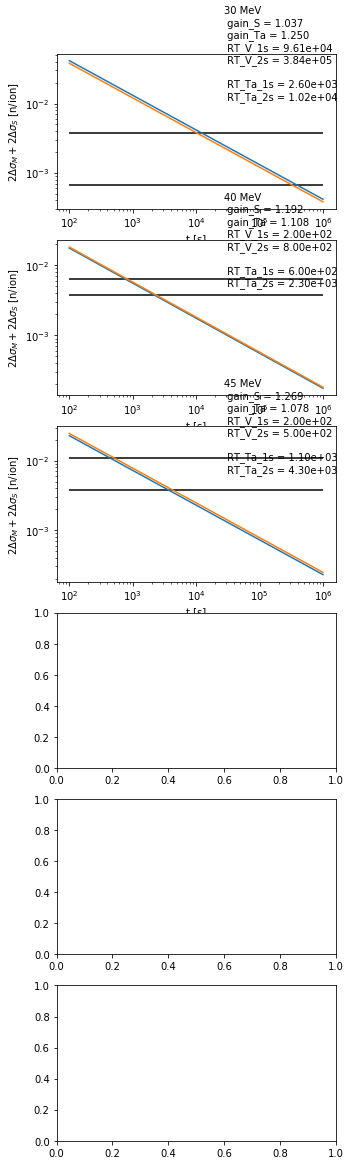

In [18]:
# erros < differnce vs. run-time
fig, axes = plt.subplots(df['Energy'].nunique(),1, figsize = (5,20))

def dsigma(t,T,m,curr='False'):
        
    if curr:
        if T=='M':
            dsigma = np.sqrt(sigma_M/(gn*curr_M*t/C) + (sigma_M/(curr_M))**2*(curr_M_scale/np.sqrt(t*5))**2)
        elif T=='S': 
            if m == 'V':
                sigma_S = sigma_S_V
                curr_S = curr_S_V
                curr_S_scale = curr_S_V_scale
            elif m == 'Ta':
                sigma_S = sigma_S_Ta
                curr_S = curr_S_Ta
                curr_S_scale = curr_S_Ta_scale
                
            dsigma = np.sqrt(sigma_S/(gn*curr_S*t/C) + (sigma_S/(curr_S))**2*(curr_S_scale/np.sqrt(t*5))**2)
    else:
        if T=='M':
            dsigma = sigma_M/(gn*curr_M*t/C)
        elif T=='S':
            if m == 'V':
                sigma_S = sigma_S_V
                curr_S = curr_S_V
                curr_S_scale = curr_S_V_scale
            elif m == 'Ta':
                sigma_S = sigma_S_Ta
                curr_S = curr_S_Ta
                curr_S_scale = curr_S_Ta_scale
                
            dsigma = sigma_S/(gn*curr_S*t/C)
            
    return dsigma


for i,energy in enumerate([30,40,45]):
    df_temp = df[df['Energy'] == energy]
    
    curr = 1e-9
    
    sigma_S_V = df_temp[df_temp['Material'] == 'V']['n/ion'].values[0]
    curr_S_V = df_temp[df_temp['Material'] == 'V']['I [nA]'].values[0]*curr
    curr_S_V_error = df_temp[df_temp['Material'] == 'V']['I error [nA]'].values[0]*curr
    curr_S_V_scale = df_temp[df_temp['Material'] == 'V']['I_scale [nA]'].values[0]*curr
    
    sigma_S_Ta = df_temp[df_temp['Material'] == 'Ta']['n/ion'].values[0]
    curr_S_Ta = df_temp[df_temp['Material'] == 'Ta']['I [nA]'].values[0]*curr
    curr_S_Ta_error = df_temp[df_temp['Material'] == 'Ta']['I error [nA]'].values[0]*curr
    curr_S_Ta_scale = df_temp[df_temp['Material'] == 'Ta']['I_scale [nA]'].values[0]*curr
    
    if 'M' in df[df['Energy'] == energy]['Target'].tolist():
        sigma_M = df_temp[df_temp['Target'] == 'M']['n/ion'].values[0]
        curr_M = df_temp[df_temp['Target'] == 'M']['I [nA]'].values[0]*curr
        curr_M_error = df_temp[df_temp['Target'] == 'M']['I error [nA]'].values[0]*curr
        curr_M_scale = df_temp[df_temp['Target'] == 'M']['I_scale [nA]'].values[0]*curr
          
        t2s_V = 1e2
        while (2*dsigma(t2s_V,'M','V')+2*dsigma(t2s_V,'S','V')) > np.abs(sigma_M-sigma_S_V):
            t2s_V = t2s_V + 1e2

        t1s_V = 1e2
        while (dsigma(t1s_V,'M','V')+dsigma(t1s_V,'S','V')) > np.abs(sigma_M-sigma_S_V):
            t1s_V = t1s_V + 1e2
            
            
        t2s_Ta = 1e2
        while (2*dsigma(t2s_Ta,'M','Ta')+2*dsigma(t2s_Ta,'S','Ta')) > np.abs(sigma_M-sigma_S_Ta):
            t2s_Ta = t2s_Ta + 1e2

        t1s_Ta = 1e2
        while (dsigma(t1s_Ta,'M','Ta')+dsigma(t1s_Ta,'S','Ta')) > np.abs(sigma_M-sigma_S_Ta):
            t1s_Ta = t1s_Ta + 1e2
            
        gain_V = sigma_M/sigma_S_V
        gain_Ta = sigma_M/sigma_S_Ta
        
        t = np.arange(1e2,1e6,1e2)
        
        axes[i].loglog(t,2*dsigma(t,'M','V')+2*dsigma(t,'S','V'))
        axes[i].loglog(t,2*dsigma(t,'M','Ta')+2*dsigma(t,'S','Ta'))
        axes[i].hlines(np.abs(sigma_M-sigma_S_V),t[0],t[-1])
        axes[i].hlines(np.abs(sigma_M-sigma_S_Ta),t[0],t[-1])
        axes[i].set_ylabel(r'$2\Delta\sigma_M + 2\Delta\sigma_S$ [n/ion]')
        axes[i].text(0.6,0.7,'''{} MeV \n gain_S = {:.3f} \n gain_Ta = {:.3f} \n RT_V_1s = {:.2e} \n RT_V_2s = {:.2e}
                     \n RT_Ta_1s = {:.2e} \n RT_Ta_2s = {:.2e}'''.format(energy,gain_V,gain_Ta,t1s_V,t2s_V,t1s_Ta,t2s_Ta),transform=axes[i].transAxes)

    else:
        
        t2s = 10
        while 2*dsigma(t2s,'S') > sigma_S:
            t2s = t2s + 10

        t1s = 10
        while dsigma(t1s,'S') > sigma_S:
            t1s = t1s + 10
            
        t = np.arange(10,1e3,10)
            
        axes[i].loglog(t,2*dsigma(t,'S'))
        axes[i].hlines(sigma_S,t[0],t[-1])
        axes[i].set_ylabel(r'$2\Delta\sigma_S$ [n/ion]')
        axes[i].text(0.6,0.7,'{} MeV \n RT_1s = {:.2e} \n RT_2s = {:.2e}'.format(energy,t1s,t2s),transform=axes[i].transAxes)    
        

    axes[i].set_xlabel('t [s]')
    
plt.show()
#TODO: 
#add 20 MeV deviation from zero


## plot yield vs. energy for diff. targets

In [47]:
PATH_TO_DATA = '/home/marius/Jülich/Experiments/CBAC 01_2019/Proposal/'

In [16]:
MATERIALS = ['Beryllium','Tantalum','Vanadium']
ENERGY_MAX = '70'

df_T = pd.DataFrame()
for material in MATERIALS:

    with open(PATH_TO_DATA + 'Data/TENDL_2017_p_{}MeV'.format(ENERGY_MAX), newline = '') as file:
        lines = file.readlines()
        if material == 'Vanadium':
            start = next(num for num,s in enumerate(lines) if '1 MeV Vanadium' in s)
            end_M = next(num for num,s in enumerate(lines) if '20 MeV Vanadium' in s)
            start_S = next(num for num,s in enumerate(lines) if '22 MeV Vanadium' in s)
            end = next(num for num,s in enumerate(lines) if '{} MeV Vanadium'.format(ENERGY_MAX) in s)
            values = lines[start:end_M+1] + lines[start_S:end+1]
        else:
            start = next(num for num,s in enumerate(lines) if '1 MeV {}'.format(material) in s)
            end = [num for num,s in enumerate(lines) if '{} MeV {}'.format(ENERGY_MAX, material) in s]
            end = next(num for num in end if num >= start)
            values = lines[start:end+1]
        values = [item.strip().split() for item in values]

    df_T  = df_T.append(pd.DataFrame(values))
    
df_T.head()    

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,MeV,Beryllium,0.016,mm,0.0,n/ion,0.0,n/mA,0.0,t/ion,0.0,Bq/ion
1,2,MeV,Beryllium,0.03252,mm,0.0,n/ion,0.0,n/mA,0.0,t/ion,0.0,Bq/ion
2,3,MeV,Beryllium,0.04777,mm,2.0277681199099938e-05,n/ion,126766112598.60841,n/mA,0.0,t/ion,0.0,Bq/ion
3,4,MeV,Beryllium,0.06193999999999998,mm,5.315347883632008e-05,n/ion,459055579871.2166,n/mA,0.0,t/ion,0.0,Bq/ion
4,5,MeV,Beryllium,0.07538000000000003,mm,7.474071160087345e-05,n/ion,926297833532.6948,n/mA,0.0,t/ion,0.0,Bq/ion


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

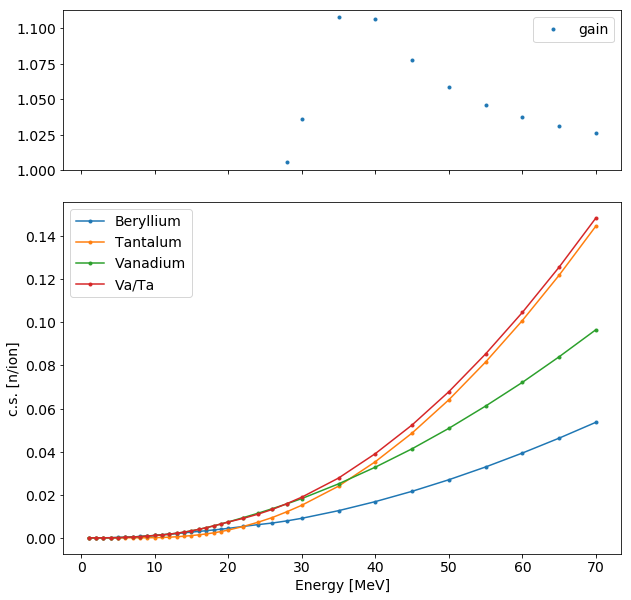

In [53]:
df_test = df_T[[0,1,2,5,6]]
df_test[0] = df_test[0].apply(float)
df_test[5] = df_test[5].apply(float)

df_M = df_test[df_test[2] == 'Vanadium']
df_M.loc[df_M[0]>20,[5]] = df_test[(df_test[2] == 'Tantalum') & (df_test[0]>20)][5]
df_M[2] = df_M[2].map({'Vanadium':'Va/Ta'})

df_test = df_test.append(df_M)

# calc. cum. sum + plot (c.s + gain)
fig = plt.figure(figsize = (10,10))

ax1 = plt.subplot2grid((3,1),(1,0), rowspan = 2)
ax = plt.subplot2grid((3,1),(0,0), sharex = ax1)

df_g = pd.DataFrame()
gain = pd.DataFrame()

plt.rcParams.update({'font.size': 14})

for materials in df_test[2].unique():
    df_temp = df_test[df_test[2]==materials]
    df_temp = df_temp.assign(CS = df_temp[5].cumsum())
    df_temp.plot(x = 0,
                 y = 'CS',
                 ax = ax1,
                 style='.-')
    df_g = df_g.append(df_temp)

df_g = df_g[df_g[2] != 'Beryllium']
gain[0] = df_g[0].drop_duplicates()
for energy in df_g[0].unique():
    gain.loc[gain[0] == energy,'gain'] = df_g[(df_g[0] == energy) & (df_g[2] == 'Va/Ta')]['CS']/ \
                                         df_g[(df_g[0] == energy) & (df_g[2] != 'Va/Ta')]['CS'].max()    


gain[(gain[0] > 26)].plot(x = 0,
                          y = 'gain',
                          ax = ax,
                          style='.')
    
ax1.legend(df_test[2].unique())
ax1.set_xlabel('Energy [MeV]')
ax1.set_ylabel('c.s. [n/ion]')

ax.set_xlabel('Energy [MeV]')
ax.set_ylim(1)

plt.savefig(PATH_TO_DATA + 'Gain.png', format = 'png', dpi=900)
plt.show()